In [61]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.ticker as ticker

# Map 1 library
import plotly.express as px

# Map 2 libraries
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Import data
train_csv = pd.read_csv("../input/Dataset/train.csv")
test_csv = pd.read_csv("../input/Dataset/test.csv")

# Create some time features
train_csv['year'] = train_csv['date'].apply(lambda x: x.split('-')[0])
train_csv['month'] = train_csv['date'].apply(lambda x: x.split('-')[1])
train_csv['day_of_month'] = train_csv['date'].apply(lambda x: x.split('-')[2])

print("There are {:,} unique bird species in the dataset.".format(len(train_csv['species'].unique())))
train_csv

There are 264 unique bird species in the dataset.


,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,author,primary_label,longitude,length,time,recordist,license,year,month,day_of_month
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,2013,05,25
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2013,05,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21370,4.5,no,yetvir,1 (mono),2019-05-15,both,28,XC477608.mp3,level,Yellow-throated Vireo,...,Sue Riffe,Vireo flavifrons_Yellow-throated Vireo,-84.0131,0-3(s),13:00,Sue Riffe,Creative Commons Attribution-NonCommercial-Sha...,2019,05,15
21371,3.5,no,yetvir,1 (mono),2017-05-14,Not specified,52,XC500348.mp3,Not specified,Yellow-throated Vireo,...,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,15:00,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...,2017,05,14
21372,5.0,no,yetvir,1 (mono),2017-06-10,Not specified,96,XC501230.mp3,Not specified,Yellow-throated Vireo,...,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,13:30,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...,2017,06,10
21373,3.5,no,yetvir,2 (stereo),2009-05-06,level,35,XC54828.mp3,level,Yellow-throated Vireo,...,Mike Nelson,Vireo flavifrons_Yellow-throated Vireo,-83.9462,>10(s),9:45am,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,2009,05,06


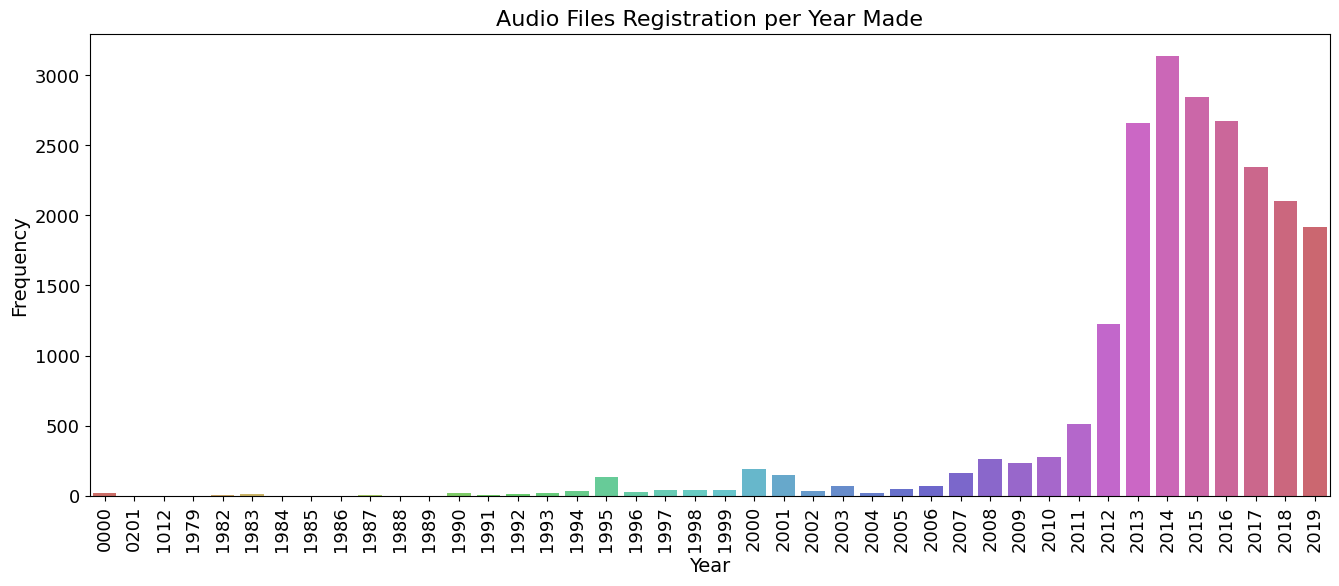

In [63]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=train_csv.sort_values(by='year'), x='year', palette="hls")
plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

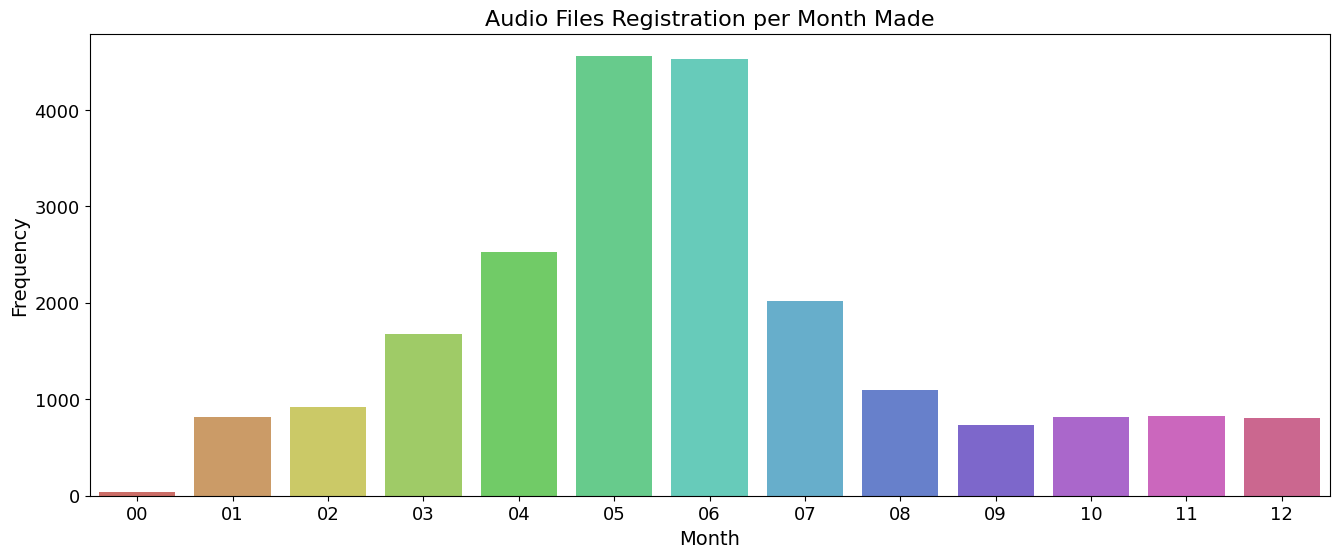

In [39]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=train_csv.sort_values(by='month'), x='month', palette="hls")
plt.title("Audio Files Registration per Month Made", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Month", fontsize=14)
plt.show()

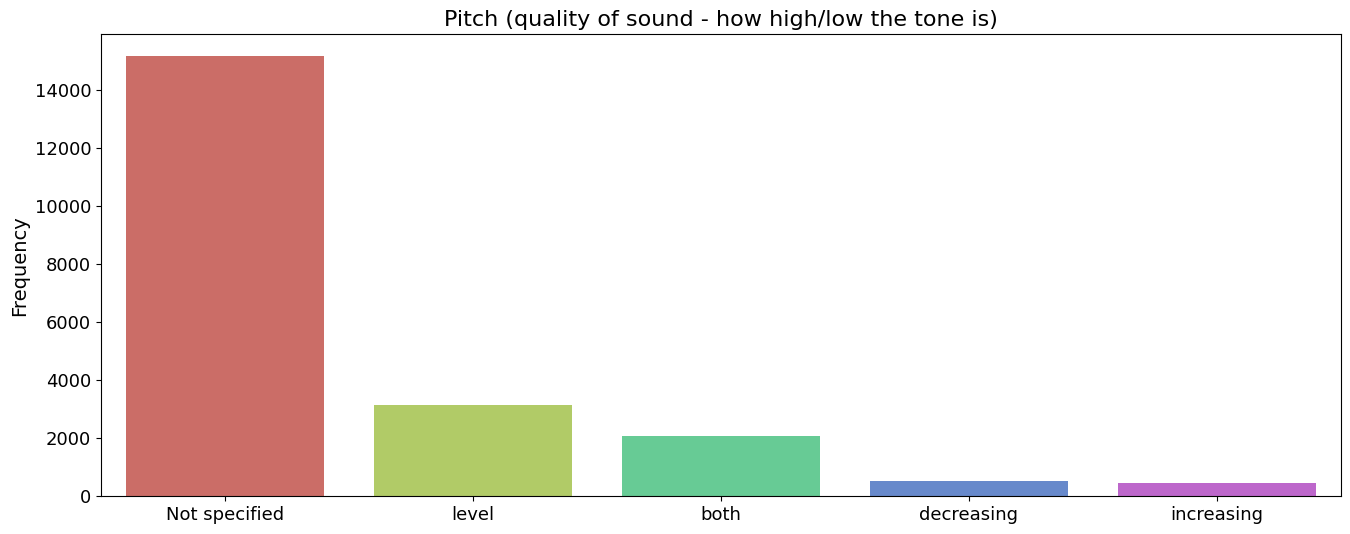

In [40]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=train_csv, x='pitch', palette="hls", order = train_csv['pitch'].value_counts().index)
plt.title("Pitch (quality of sound - how high/low the tone is)", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("")
plt.show()

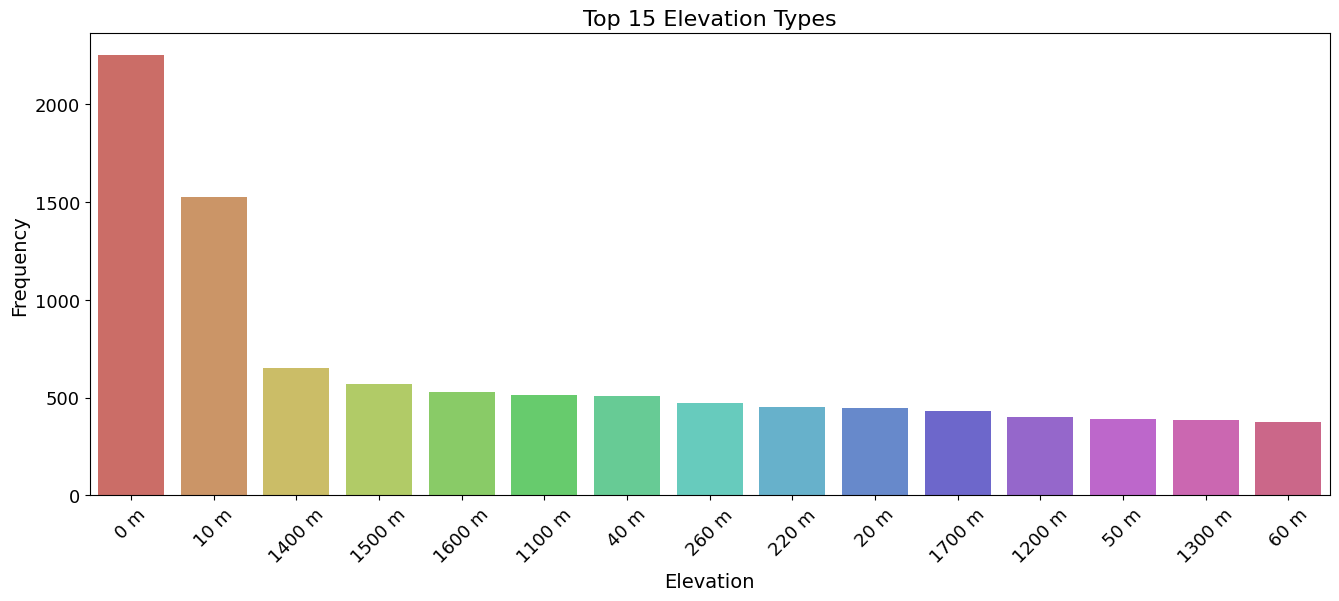

In [52]:
# Top 15 Elevation Types
top_15 = list(train_csv['elevation'].value_counts().head(15).index)
data = train_csv[train_csv['elevation'].isin(top_15)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(data=data, x='elevation', palette="hls", order=data['elevation'].value_counts().index)
plt.title("Top 15 Elevation Types", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("Elevation", fontsize=14)
plt.show()


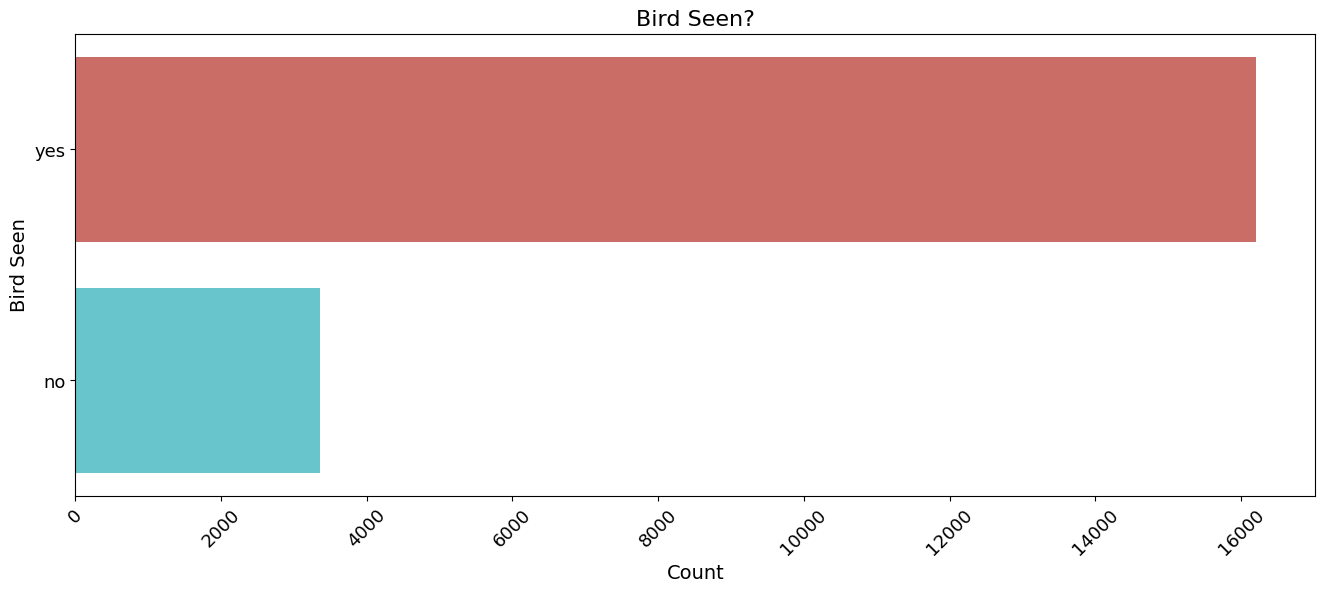

In [64]:
# Song was heard, but was Bird Seen?
data = train_csv['bird_seen'].value_counts().reset_index()
data.columns = ['bird_seen', 'count']

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='count', y='bird_seen', data=data, palette="hls")
plt.title("Bird Seen?", fontsize=16)
plt.ylabel("Bird Seen", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("Count", fontsize=14)
plt.show()

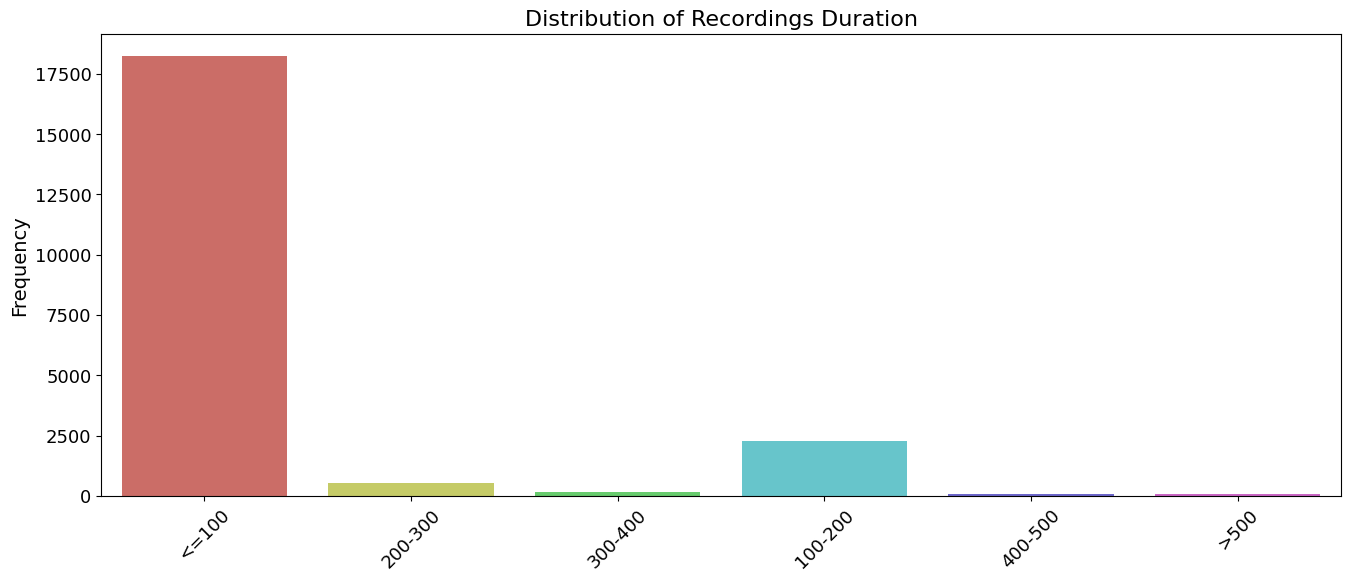

In [60]:
# Creating Interval for *duration* variable
train_csv['duration_interval'] = ">500"
train_csv.loc[train_csv['duration'] <= 100, 'duration_interval'] = "<=100"
train_csv.loc[(train_csv['duration'] > 100) & (train_csv['duration'] <= 200), 'duration_interval'] = "100-200"
train_csv.loc[(train_csv['duration'] > 200) & (train_csv['duration'] <= 300), 'duration_interval'] = "200-300"
train_csv.loc[(train_csv['duration'] > 300) & (train_csv['duration'] <= 400), 'duration_interval'] = "300-400"
train_csv.loc[(train_csv['duration'] > 400) & (train_csv['duration'] <= 500), 'duration_interval'] = "400-500"


plt.figure(figsize=(16, 6))
ax = sns.countplot(data = train_csv, x = 'duration_interval', palette="hls")
plt.title("Distribution of Recordings Duration", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("")
plt.show()

In [69]:
def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes / feature
    param: feature - the feature to analyze
    param: title - title to add to the graph
    param: df - dataframe from which we plot feature's classes distribution 
    param: size - default 1.
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(data = df, x=feature, order = df[feature].value_counts().index[:20], palette='Set1')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

sampling_rate values: 8


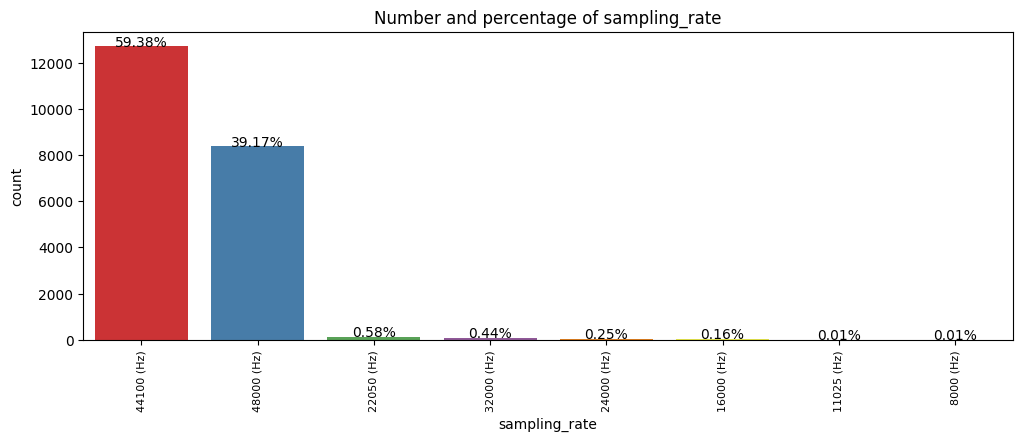

In [70]:
print(f"sampling_rate values: {train_csv.sampling_rate.nunique()}")
plot_count("sampling_rate", "sampling_rate", train_csv, size=3)

country values: 95


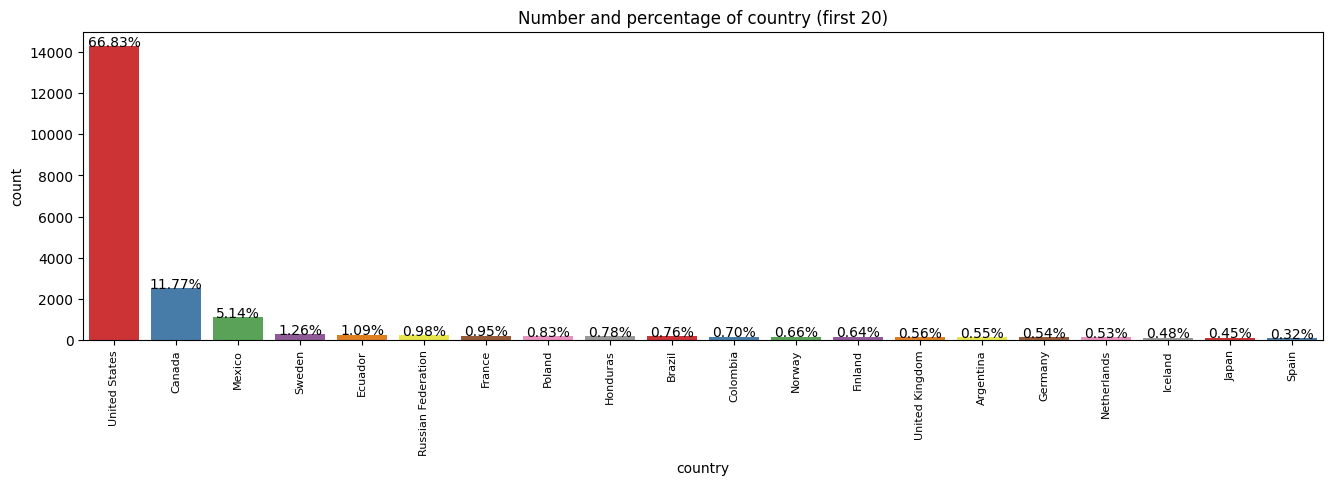

In [71]:
print(f"country values: {train_csv.country.nunique()}")
plot_count("country", "country (first 20)", train_csv, size=4)

year values: 42


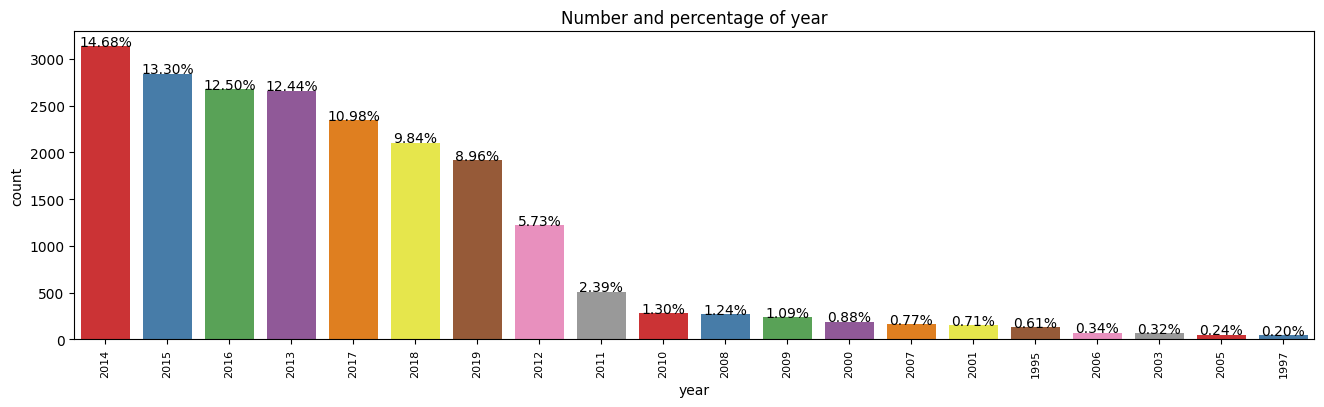

In [72]:
print(f"year values: {train_csv.year.nunique()}")
plot_count("year", "year", train_csv, size=4)

In [9]:
train['recordist'].value_counts()[:10].sort_values().iplot(kind='barh',color='#3780BF')

In [11]:
train['playback_used'].value_counts()

labels = train['playback_used'].value_counts().index
values = train['playback_used'].value_counts().values
colors=['#3795bf','#bfbfbf']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

In [75]:
!jupyter nbconvert "EDA copy.ipynb" --to script

[NbConvertApp] Converting notebook EDA copy.ipynb to script
[NbConvertApp] Writing 10516 bytes to EDA copy.py
